### Домашняя работа

**Задание простого уровня** Мы говорили, что метрики качества нужны, чтобы сравнивать различные модели между собой. В задаче полиномиальной регрессии реализуйте код для выбора лучшей степени полиному:

* возьмите все степени от 1 до 10 по порядку, без пропусков.
* найдите степень полинома, где будет лучший r2-score
* напишите код, который выводит самую подходящую степень полинома и соответствующий ей скор

Эта процедура называется Grid Search и помогает найти лучшие параметры для модели.

Обучите лучшую модель и сделайте predict

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('3.10_non_linear.csv')

In [2]:
df.head()

,x_train,y_train
0,0.138368,0.838812
1,0.157237,0.889313
2,0.188684,1.430040
3,0.685553,1.717309
4,0.874237,2.032588


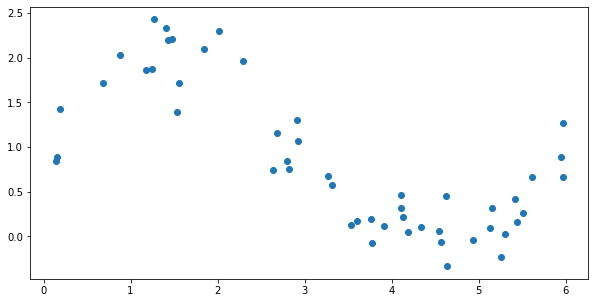

In [3]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (10,5))
axes = plt.axes()
plt.scatter(df['x_train'],df['y_train'])
plt.show()

In [4]:
def generate_degrees(source_data: list, degree: int):
    
    return np.array([
        source_data**n for n in range(1, degree + 1)
    ]).T
syntetic = generate_degrees(df['x_train'], 10)

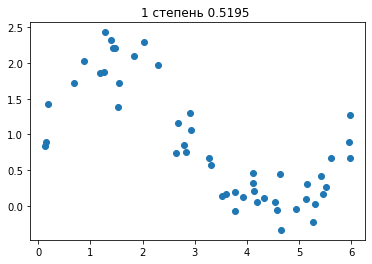

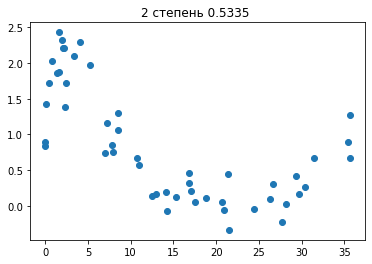

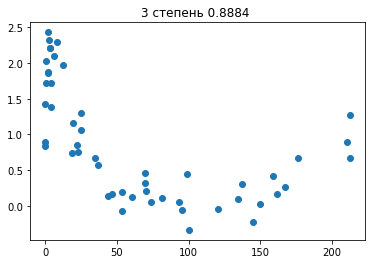

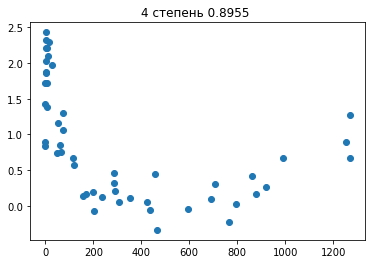

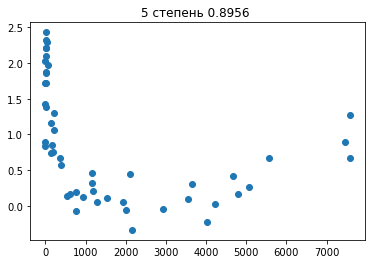

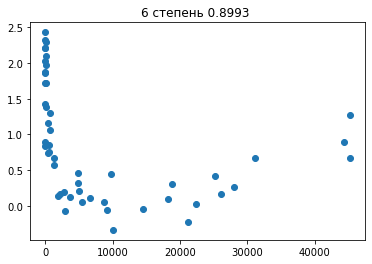

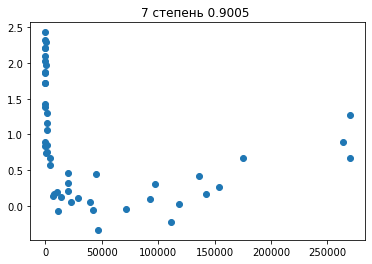

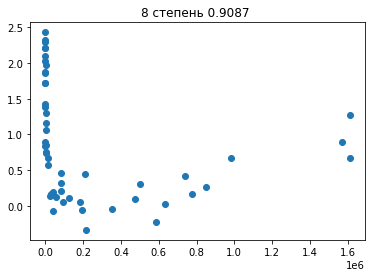

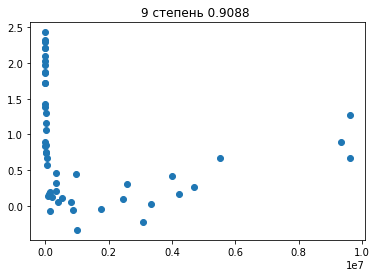

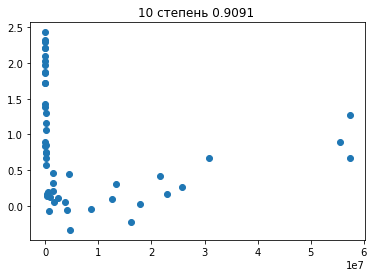

In [5]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

axes = plt.axes()
for i in range(10):
    plt.scatter(syntetic[::,i],df["y_train"])
    
    
    #обучаем
    reg = LinearRegression().fit(syntetic[::,:(i+1)],df["y_train"])
    # на обученном датасете проверяем
    y_pred = reg.predict(syntetic[::,:(i+1)])
    
    # и на предсказанном проверяем r2_score
    plt.title(f'{i+1} степень '+f'%.4f '%\
              r2_score(df["y_train"],y_pred))
    plt.show()

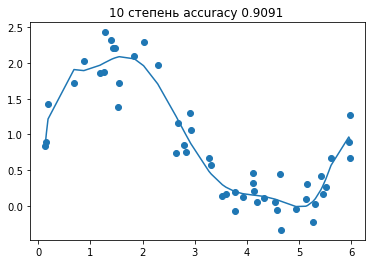

In [6]:
from sklearn.linear_model import LinearRegression

degree = 10
syntetic = generate_degrees(df['x_train'], degree)\

reg = LinearRegression().fit(syntetic,df["y_train"])
y_pred = reg.predict(syntetic)




plt.scatter(df["x_train"],df["y_train"])
plt.plot(df["x_train"], y_pred)
#plt.title(f'{degree} степень'+f' accuracy %.4f '% r2_score(syntetic[::,degree-1],df["y_train"]))

plt.title(f'{degree} степень'+f' accuracy %.4f '% r2_score(df["y_train"],y_pred))

plt.show()

**Задание среднего уровня** Напишите класс для обучения модели, который содержит:

* функцию `.fit(X, y)` , которая принимает на вход массив фичей `X`, массив таргетов `y` и обучает коэффициенты регрессии. Код для обучения взять из первого урока модуля *Постановка ML задачи линейной регрессии*
* функцию `.predict(X)`, которая по массиву фичей `X` возвращает массив предсказаний `y`

Нужно использовать код для аналитически вычисляемых коэффициентов. 

Это задание позволит понять, как работает линейная регрессия "внутри" библиотечной реализации.

In [7]:
from numpy.linalg import inv
import numpy as np
class CustomLinearReg:
    def __init__(self):
        self.X = 0
        self.y = 0
        self.pred = None
    def fit(self,X, y):
        self.size = X.shape[0]
        #self.__init__(self)
        # модель, которая приводит к размерности [50,2]
        x = np.array([((i%2 != 0) * X[i//2]) + (i%2 == 0)  for i in range(self.size * 2)])
        
        x = x.reshape(self.size,2)
        Y = np.expand_dims(y,axis = 1)
        self.pred = inv(
            (x.T).dot(x)
        ).dot(
            x.T
        ).dot(
            Y
        )
        return self
    
    
    
    def predict(self,X):
        self.size = X.shape[0]
        #print(X)
        #x = np.array( [ [i] for i in X])
        #print(X.values[0])
        x = np.array([((i%2 != 0) * X.values[i//2]) + (i%2 == 0)  for i in range(self.size * 2)])
        x = x.reshape(self.size,2)
        
        return x.dot(self.pred).reshape(-2)

In [8]:
train = np.array(df['x_train']).reshape(df['x_train'].shape[0],1)
reg = CustomLinearReg().fit(train,df['y_train'])#.fit(df['x_train'],df['y_train'])
reg.predict(df['x_train']).shape

(50,)

**Задание высокого уровня**

1. разделите датасет с домами Бостона из Урока 2 (таргет и фичи) на две части: в одной части 80% датасета (назовём train) в другой 20% (назовём valid) с помощью функции `train_test_split` из библиотеки `sklearn`
1. обучите модель только на train датасете
1. постройте предсказания valid датасете
1. Посчитайте  `r2 score` на валидационном сете

После этого примените к обеим датасетам z-преобразование и повторите шаги 2-4. Как изменилась метрика r2?

Это задание поможет понять, как валидировать линейную регрессию (и другие модели) на отложенной выборке.

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
x_train, x_valid, y_train, y_valid = train_test_split(df[['x_train']], df[['y_train']],random_state=10, train_size = 0.8)

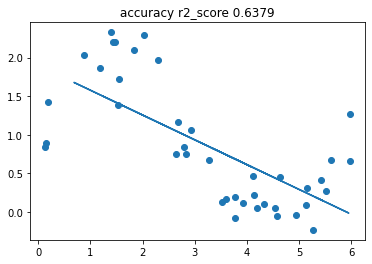

In [66]:
reg = LinearRegression().fit(x_train,y_train)
prediction = reg.predict(x_valid)


plt.scatter(x_train, y_train)
plt.plot(x_valid, prediction)
plt.title(' accuracy r2_score %.4f '% r2_score(y_valid, prediction))
plt.show()

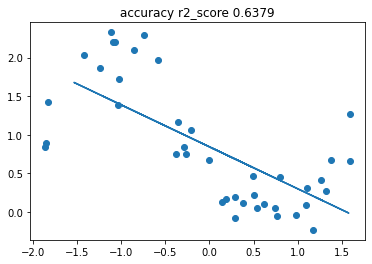

In [70]:
x_train, x_valid, y_train, y_valid = train_test_split(df[['x_train']], df[['y_train']],random_state=10, train_size = 0.8)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_valid = scaler.transform(x_valid)

reg = LinearRegression().fit(x_train,y_train)
prediction = reg.predict(x_valid)

plt.scatter(x_train, y_train)
plt.plot(x_valid, prediction)
plt.title(' accuracy r2_score %.4f '% r2_score(y_valid, prediction))
plt.show()